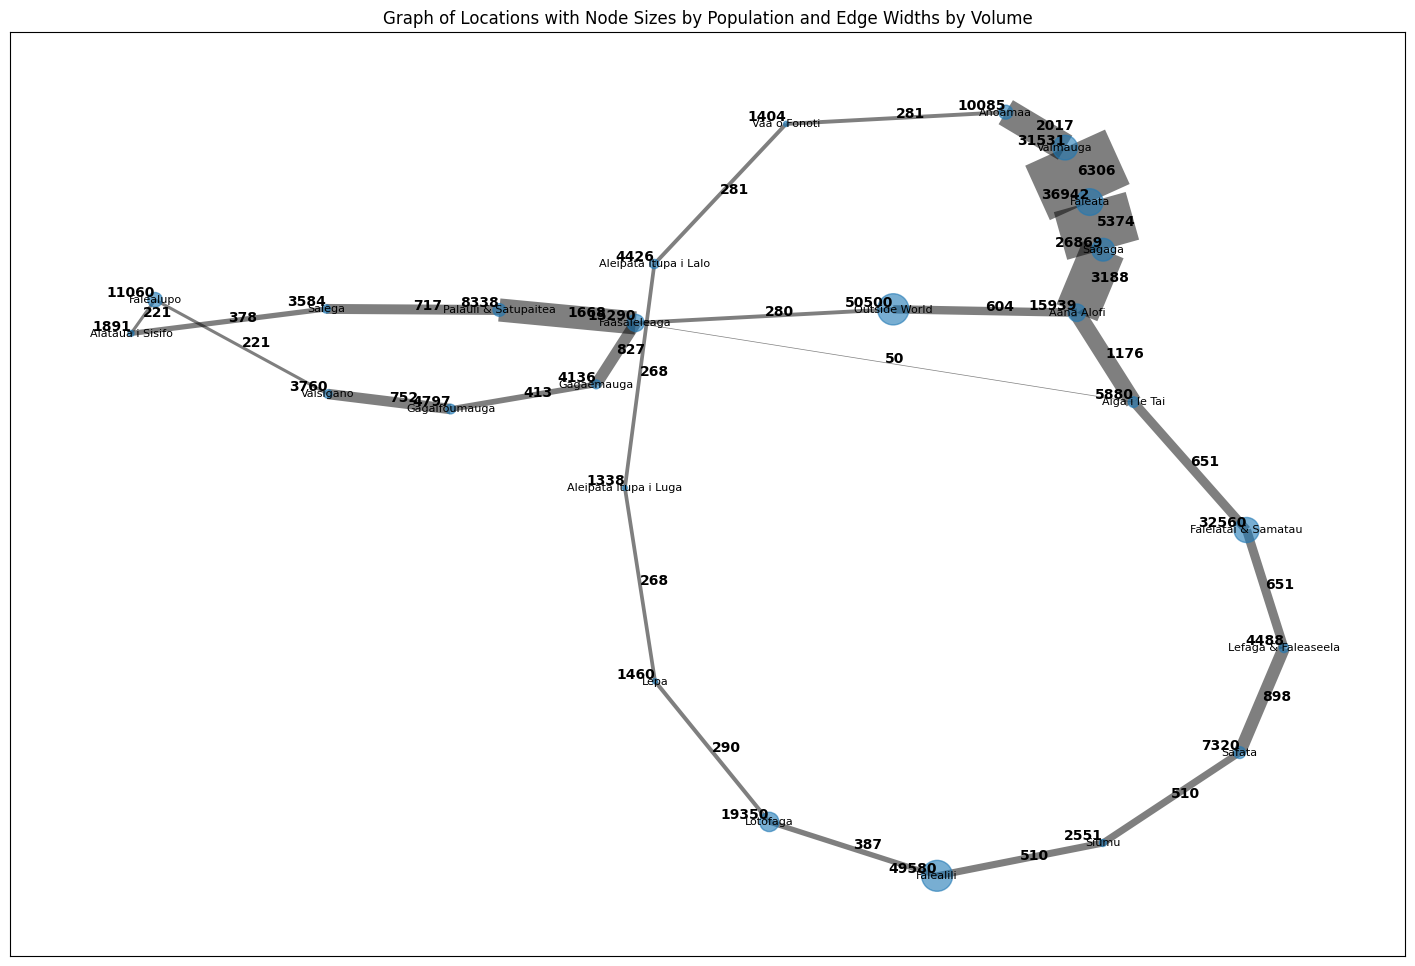

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import json

plt.figure(figsize=(18, 12))

json_path = 'Samoa_scenario3.json'
with open(json_path, 'r') as file:
    df = json.load(file)

locations = df['n']
links = df['Connectivity Matrix W']
ports = df['ports_according_communities']

location_map = {}
for location, port_list in ports.items():
    for port in port_list:
        location_map[port.strip()] = location


G = nx.Graph()

for location, population in locations.items():
    G.add_node(location, size=population, label=f"{population}")

# volume
for connection, volume in links.items():
    loc1, loc2 = [location_map[port.strip()] for port in connection.split(',')]
    G.add_edge(loc1, loc2, weight=volume, label=f"{volume}")


pos = nx.spring_layout(G)
sizes = [G.nodes[node]['size'] / 100 for node in G]
weights = [G[u][v]['weight'] / 100 for u, v in G.edges()]

nx.draw_networkx_nodes(G, pos, node_size=sizes, alpha=0.6)
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

for node, (x, y) in pos.items():
    plt.text(x, y, s=G.nodes[node]['label'], horizontalalignment='right', verticalalignment='bottom', fontweight='bold')


for (u, v, attr) in G.edges(data=True):
    weight = attr['weight']
    mid_x, mid_y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
    plt.text(mid_x, mid_y, s=f"{weight}", fontweight='bold', color='black')

plt.title('Graph of Locations with Node Sizes by Population and Edge Widths by Volume')
plt.show()
